In [1]:
#This file is written by TW. To test and visualize different functions.


In [2]:
import Spectrum_mol as Spec
import numpy as np
import matplotlib.pyplot as plt
import generate_spec.ipynb as gen

#import the spectum for Fuco in non-polar solvent
w_exp=[]
A_exp=[]
#fin=open("Fuco_non_polar.txt", 'r')

ModuleNotFoundError: No module named 'generate_spec'

In [3]:
#
N=6.4
w0=0.0
T=300.0
pigment='CAR_2MODE'
vargs=(450.0, 53.0, 900.0, 106.0, 1536.0, 900.0, 106.0, 1150.0)
osc=1.0
dt=0.001
timesteps=np.arange(0.0, 1.0, dt) #This is a total time range of 1 ps in steps of 1 fs. This is currently hard-coded and will need fixing
Ft_response=[] #the response function (spectrum in the time domain)
At_response=[]


In [4]:

"""
#below is to re-calculate Ft/At function

for t in timesteps:
    Ft_response.append(Spec.Ft(t,w0,T,pigment,vargs))
    At_response.append(Spec.At(t,w0,T,pigment,vargs))

np.save("./Ft(0, 1.0, 1000).npy", np.array(Ft_response))
np.save("./At(0, 1.0, 1000).npy", np.array(At_response))
"""

'\n#below is to re-calculate Ft/At function\n\nfor t in timesteps:\n    Ft_response.append(Spec.Ft(t,w0,T,pigment,vargs))\n    At_response.append(Spec.At(t,w0,T,pigment,vargs))\n\nnp.save("./Ft(0, 1.0, 1000).npy", np.array(Ft_response))\nnp.save("./At(0, 1.0, 1000).npy", np.array(At_response))\n'

In [5]:
Ft_response = np.load("./CAR2_Ft(0, 1.0, 0.001).npy")
At_response = np.load("./CAR2_At(0, 1.0, 0.001).npy")

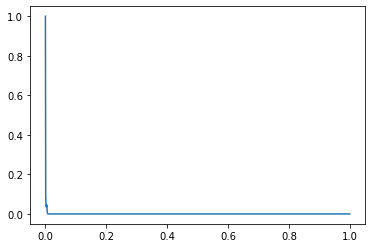

In [6]:
timesteps=np.arange(0.0,1.0,dt)
plt.plot(timesteps, At_response.real)
#print(At_response)

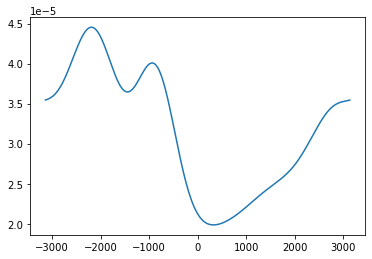

In [7]:
time, Fw_response = Spec.fft2w(Ft_response,dt)
plt.plot(time, Fw_response)

In [8]:
plt.plot(np.arange(0,1000), Aw.real)

NameError: name 'Aw' is not defined

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


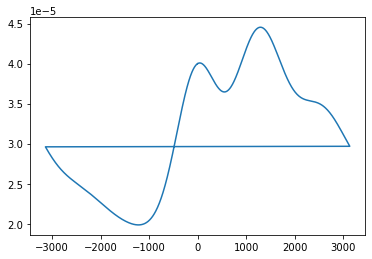

In [9]:
A_freq_test1 = np.fft.ifft(At_response,norm='ortho')
A_freq_test1 *= dt
w=np.fft.fftfreq(A_freq_test1.size)*((2*np.pi)/dt)
plt.plot(w, A_freq_test1)

In [10]:
Fw = Spec.fft2w(np.array(Ft_response), dt)
Aw = Spec.fft2w(np.array(At_response), dt)


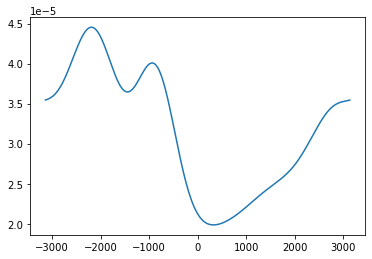

In [11]:
plt.plot(Fw[0],Fw[1])

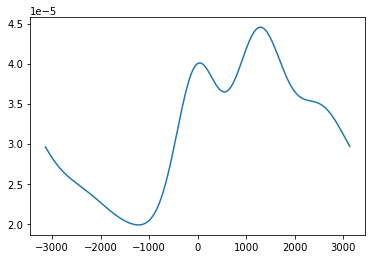

In [12]:
plt.plot(Aw[0],Aw[1])

In [ ]:
np.save("./Ft(0,0.0001,1000).npy", np.array(response))

In [ ]:
response = np.load("./Ft(0,0.0001,1000).npy")
Fw = Spec.fft2w(np.array(response), 0.0001)
plt.plot(Fw[0],Fw[1])

In [ ]:
dt=0.00001
timesteps=np.arange(0.0,0.01,dt) #This is a total time range of 1 ps in steps of 1 fs. This is currently hard-coded and will need fixing

response=[] #the response function (spectrum in the time domain)
for t in timesteps:
    response.append(Spec.Ft(t,w0,T,pigment,vargs))
    
plt.plot(timesteps,response)

In [ ]:
def plot_At():
    dt=0.001
    timesteps=np.arange(0.0,1.0,dt) #This is a total time range of 1 ps in steps of 1 fs. This is currently hard-coded and will need fixing

    response=[] #the response function (spectrum in the time domain)
    for t in timesteps:
        response.append(At(t,w0,T,pigment,vargs))
    
    plt.plot(timesteps,response)
    return

def plot_Ft():
    dt=0.001
    timesteps=np.arange(0.0,1.0,dt) #This is a total time range of 1 ps in steps of 1 fs. This is currently hard-coded and will need fixing

    response=[] #the response function (spectrum in the time domain)
    for t in timesteps:
        response.append(Ft(t,w0,T,pigment,vargs))
    
    plt.plot(timesteps,response)
    return

In [ ]:

spec=Spec.Aw(osc,w0,T,pigment,vargs)[1]
waxis=Spec.Aw(osc,w0,T,pigment,vargs)[0]

#Normalization of spectra
N_exp=np.trapz(A_exp,x=w_exp)
A_exp=A_exp/N_exp

spec=N*spec

plt.plot(waxis,spec)
plt.plot(w_exp,A_exp)

In [ ]:

plot_data = Spec.Aw(osc,w0,T,pigment,vargs)

spec=plot_data[1]
waxis=plot_data[0]

#Normalization of spectra
N_exp=np.trapz(A_exp,x=w_exp)
A_exp=A_exp/N_exp

spec=N*spec

plt.plot(waxis,spec)
plt.plot(w_exp,A_exp)

In [ ]:

fout=open('A_spec_theor.txt','w')
for i, item in enumerate(waxis):
    fout.write(str(item)+'\t'+str(spec[i])+'\n')
fout.close()

fout=open('A_spec_exp.txt','w')
for i, item in enumerate(w_exp):
    fout.write(str(item)+'\t'+str(A_exp[i])+'\n')
fout.close()

#True normalization of the theoretical spectrum for use in further calculations
N_theor=np.trapz(spec,x=waxis)
Aw_norm=spec/N_theor

fout=open('Aw_Fuco_norm.txt','w')
for i, item in enumerate(waxis):
    fout.write(str(item)+'\t'+str(Aw_norm[i])+'\n')
fout.close()


In [ ]:
At = np.loadtxt("A_spec_theor.txt")
At.shape
